Importing Libraies

In [ ]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
# data set having 1.6 million tweets
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/trainingDT.csv', encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
dataset['sentiment']=dataset['sentiment'].replace(4,1);

In [ ]:
dataset

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
text = dataset['text']
sentiment = dataset['sentiment']

<BarContainer object of 2 artists>

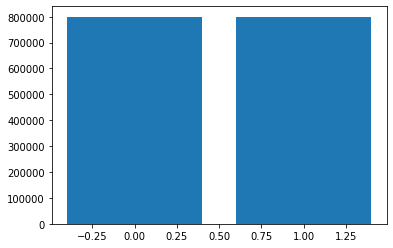

In [ ]:
# Plotting the distribution for dataset.
# 0 is for negative
# 4 is for positive
distribution = dataset.sentiment.value_counts()
plt.figure()
plt.bar(distribution.index, distribution.values)

In [ ]:
!pip install contractions

     |████████████████████████████████| 106 kB 7.3 MB/s 
     |████████████████████████████████| 284 kB 53.2 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Preprocessing

In [ ]:
import contractions 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
def to_lowercase(text):
    text=text.lower()
    return text

# Removing URLs from a sample text
def remove_URL(text):
    return re.sub(r"http\S+", "URLs", text)

#Replace contractions in string of text
def replace_contractions(text):
    text = contractions.fix(text)
    return text
# removing @tags or hashtags
def cleaning_hashtag(text):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])",'Hashtag',text)

# Removing Stopwords from text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Cleaning and removing the above emojis list from the tweet text
def cleaning_emojis(text):
    return " ".join([word for word in str(text).split() if word not in emojis])

def replace_numbers(text):
    return re.sub('[0-9]+', '', text)

def remove_punctuation(text):
  return  re.sub(r'[^\w\d\s]', '',text)


In [ ]:
# normalization  of text
def normalize(text):
  text = to_lowercase(text)
  text = remove_URL(text)
  text = replace_contractions(text)
  text = cleaning_hashtag(text)
  text = cleaning_stopwords(text)
  text = cleaning_emojis(text)
  text = replace_numbers(text)
  text = remove_punctuation(text)
  return text


In [ ]:
# Removing word stem
def stem_words(words):
    # Stem words in list of tokenized words
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [ ]:
# Lemmatizing text 
def lemmatize_verbs(words):
    # Lemmatize verbs in list of tokenized words
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas



In [ ]:
def combine_single(words):
  words = " ".join(words)
  return words

In [ ]:
#preprocessing of dataset
def process_dataset(text_data):
  text_data = text.apply(lambda x: normalize(x))
  text_data= text_data.apply (lambda x: x.split())
  text_data= text_data.apply(lambda x: stem_words(x))
  text_data= text_data.apply(lambda x: lemmatize_verbs(x))
  text_data= text_data.apply (lambda x: combine_single(x))

  return text_data

In [ ]:
#preprocessing of text 
def process_text(text_data):
  text_data = normalize(text_data)
  text_data= text_data.split()
  text_data= stem_words(text_data)
  text_data= lemmatize_verbs(text_data)
  text_data= combine_single(text_data)

  return text_data

In [ ]:
# creating a column to store clean text or processed text
dataset['clean_text'] = process_dataset(text)

In [ ]:
dataset.head()

,sentiment,ids,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",hasht url hasht awwwhasht bummerhasht should g...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cannot upd facebook text ithashtaghashta...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,hasht div many tim ballhasht man sav hasht res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whol body feel itchy lik fir
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",hasht nohasht behav allhasht madhasht herehash...


Word cloud for Positive data

In [ ]:
dataset.head()

,sentiment,ids,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",hasht url hasht awwwhasht bummerhasht should g...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cannot upd facebook text ithashtaghashta...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,hasht div many tim ballhasht man sav hasht res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whol body feel itchy lik fir
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",hasht nohasht behav allhasht madhasht herehash...


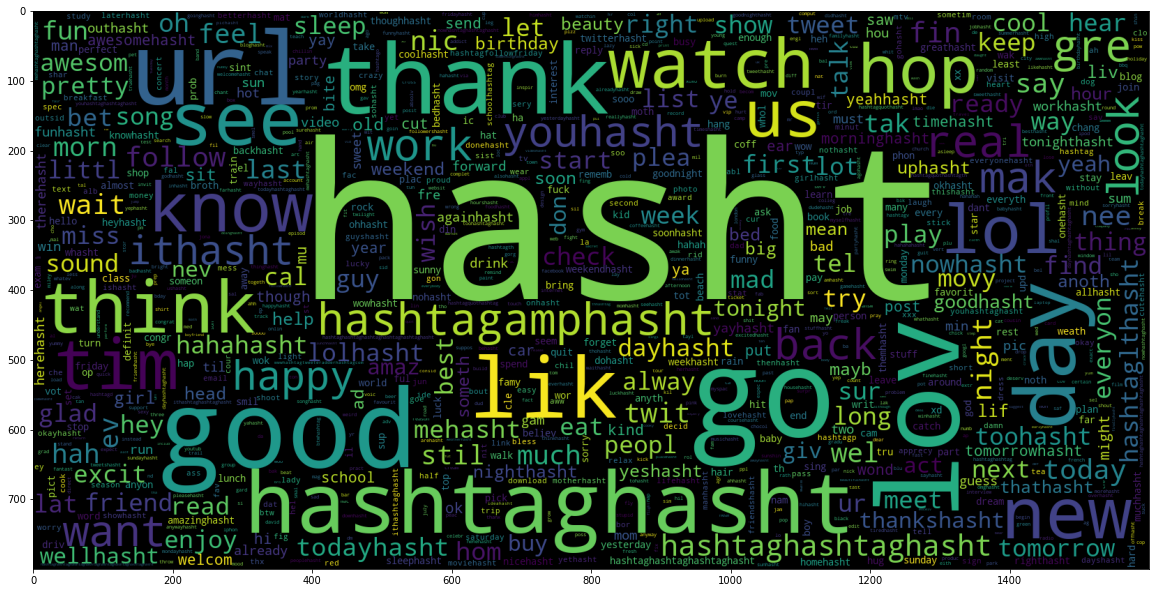

In [ ]:
data_pos = dataset['clean_text'][dataset['sentiment']==1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

Word cloud for negative data

In [ ]:
data_neg = dataset['clean_text'][dataset['sentiment']==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

Splitting the Data

In [ ]:
# 95% data is for training and 5% is for testing
X_train, X_test, y_train, y_test = train_test_split(dataset['clean_text'], dataset['sentiment'],test_size = 0.05, random_state = 1)

TF-IDF Vectoriser

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

Tranforming the dataset

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Evaluate Model Function

In [ ]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    #ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


BernoulliNB Model

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     39839
           1       0.77      0.78      0.78     40161

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000



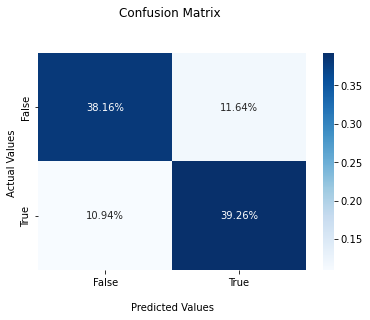

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

LinearSVC Model

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     39839
           4       0.77      0.79      0.78     40161

    accuracy                           0.77     80000
   macro avg       0.78      0.77      0.77     80000
weighted avg       0.78      0.77      0.77     80000



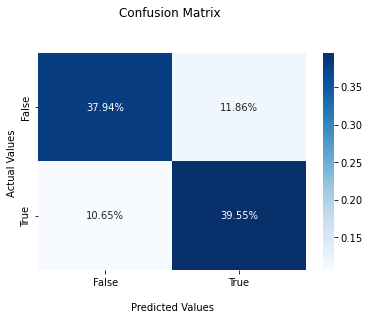

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

Logistic Regression Model

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     39839
           1       0.78      0.80      0.79     40161

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



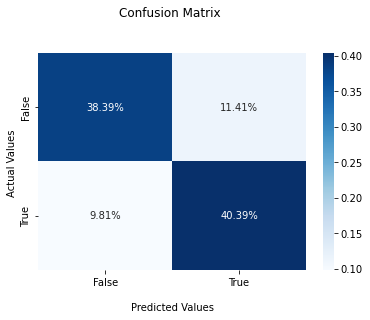

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [ ]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    # Text to classify should be in a list.
    sentence =  str(input("Enter text : "))
    S = process_text(sentence)
    text_list=[]
    text_list.append(S)
    S = vectoriser.transform(text_list)
    sentiment = SVCmodel.predict(S)
    if(sentiment[0]==4):
      print("Positive")
    else :
      print("Negative")

KeyboardInterrupt: ignored